# Simulation study
## Investigate the effects of the response distribution w.r.t the clustering groups with the model performance

### Simulation number


In [1]:
sim <- 3

## Simulation data Visualization

In [2]:
x <- read.table(paste("~/G_MTL_sim/sim", sim, "_features.txt", sep= ""))
y <- read.table(paste("~/G_MTL_sim/sim", sim, "_responses.txt", sep= ""))
print(dim(x))
print(dim(y))

[1] 400  15
[1] 400   6


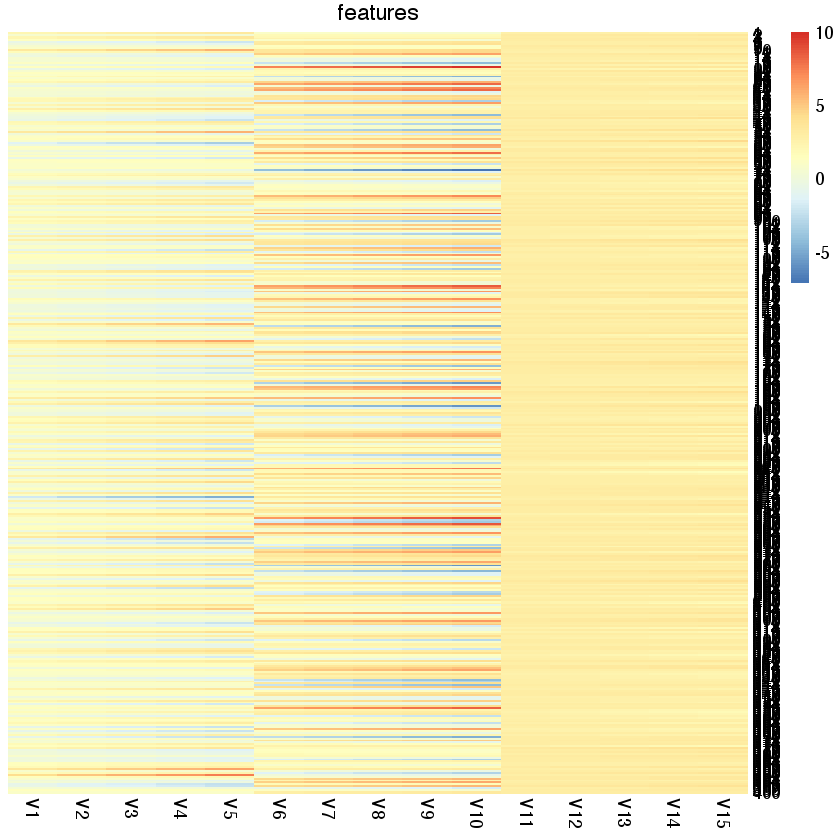

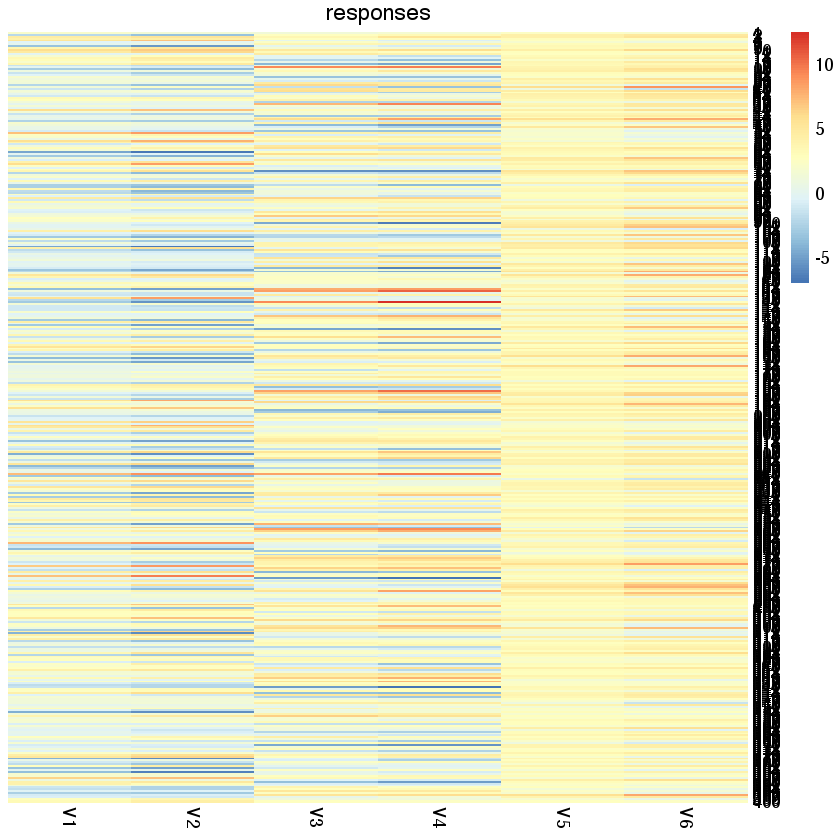

In [3]:
library(pheatmap)
pheatmap(x, cluster_rows= F, cluster_cols= F, main= "features")
pheatmap(y, cluster_rows= F, cluster_cols= F, main= "responses")

## Correlation between the responses (rows) and features (columns)

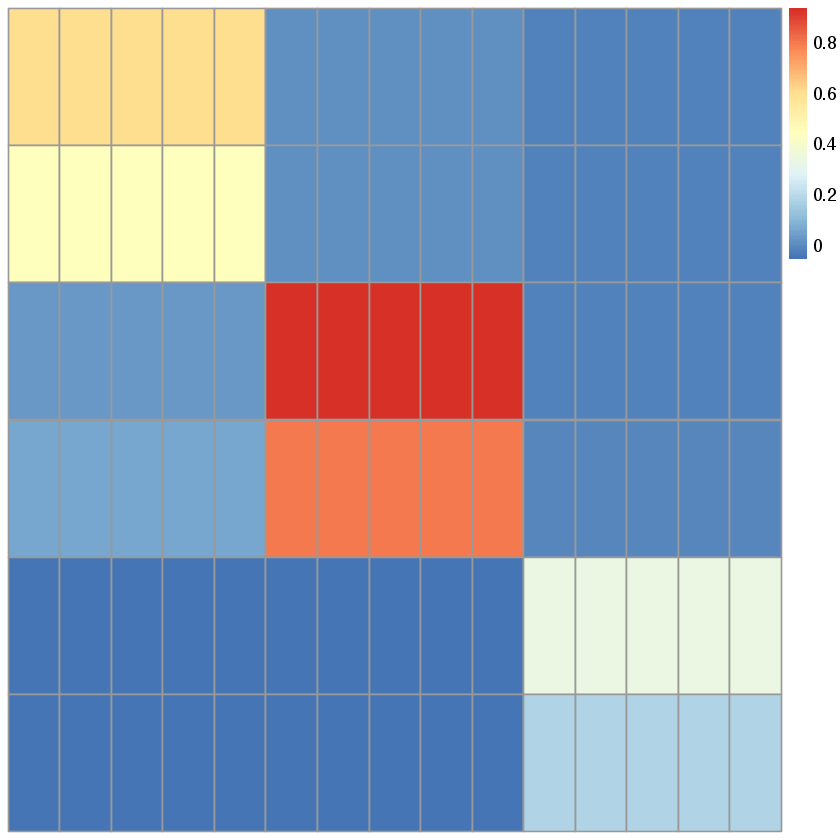

In [4]:
cors <- matrix(NA, nrow= ncol(y), ncol= ncol(x))
for(j in seq(ncol(y)))
    cors[j, ] <- sapply(seq(ncol(x)), function(i) cor(x[, i], y[, j]))
pheatmap(cors, cluster_cols = F, cluster_rows = F)

### Function
Define a function that returns the *model* accuracy on the test data stored in the *partition* object

In [5]:
get.prediction.acc <- function(partition, model){
  coefs <- rbind(model$intercept, model$B)
  test.pred <- cbind(rep(1, times= nrow(partition$test$x)), scale(partition$test$x, center= colMeans(partition$train$x), scale= apply(partition$test$x, 2, FUN= sd))) %*% coefs

  normalized.test.y <- scale(partition$test$y, center= colMeans(partition$train$y), scale= apply(partition$test$y, 2, FUN= sd))
  test.cors.p <- sapply(seq(ncol(test.pred)), function(i) cor(test.pred[, i], normalized.test.y[, i], method= "pearson"))
  test.cors.s <- sapply(seq(ncol(test.pred)), function(i) cor(test.pred[, i], normalized.test.y[, i], method= "spearman"))
  return(list(test.pred= test.pred, test.cors.p= test.cors.p, test.cors.s= test.cors.s))
}

Load the TGGLasso model output based on the hirerachical tree structure approach for the current simulation

In [6]:
load(paste("~/G_MTL_sim/scMTL_HSMM_TGGLasso_hc_sim", sim, "_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc <- get.prediction.acc(partition, TGL.model.sim.rand)


Load the TGGLasso model output based on the random tree with the hirerachical tree topology for the current simulation

In [7]:
load(paste("scMTL_HSMM_TGGLasso_random_hc_sim", sim,"_weights_corrected_max_iter_200.RData", sep= ""))
TGL.model.sim.rand <- TGL.model
sim.hc.rand <- get.prediction.acc(partition, TGL.model.sim.rand)

## Performance visualization

### Pearson correlation

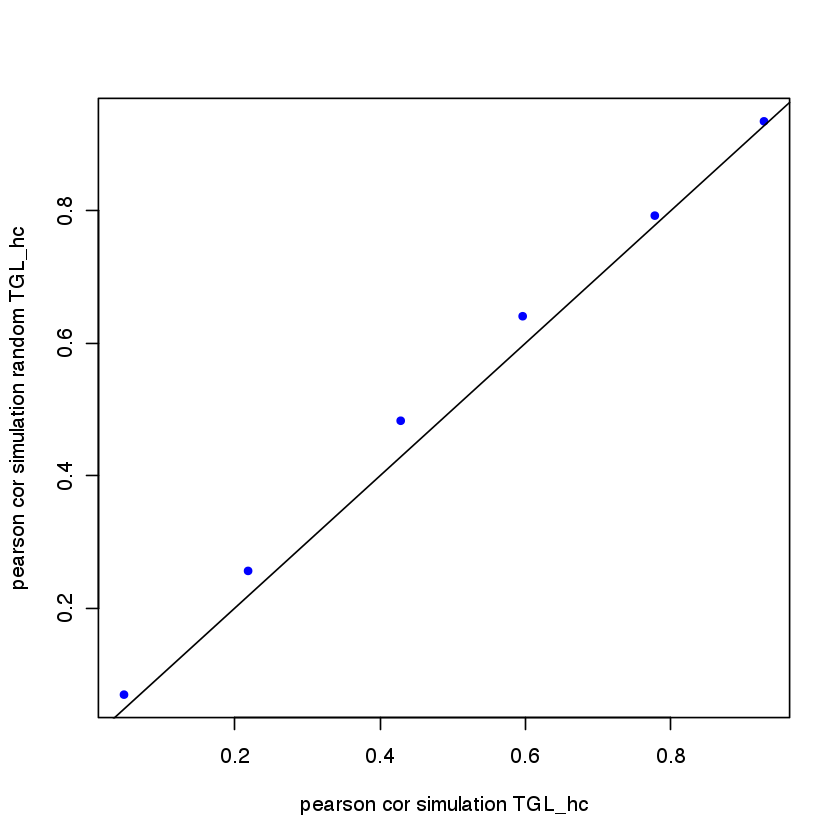

In [8]:
plot(sim.hc$test.cors.p, sim.hc.rand$test.cors.p, pch= 20, col= "blue", xlab= "pearson cor simulation TGL_hc", ylab= "pearson cor simulation random TGL_hc")
abline(a= 0, b= 1) ## Add a diagonal line

### Spearman correlation

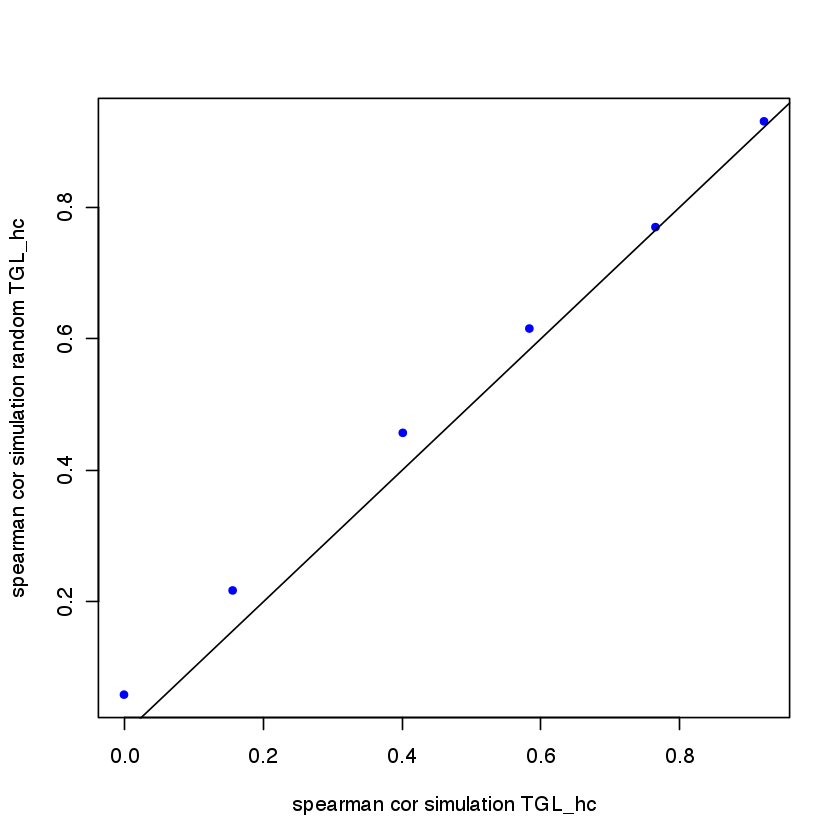

In [9]:
plot(sim.hc$test.cors.s, sim.hc.rand$test.cors.s, pch= 20, col= "blue", xlab= "spearman cor simulation TGL_hc", ylab= "spearman cor simulation random TGL_hc")
abline(a= 0, b= 1)